电商18 180412126 王佳琦

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.optim as optim
from torchvision import transforms, models

In [2]:
vgg = models.vgg16(pretrained=True).features #使用预训练的VGG16，features表示只提取不包括全连接层的部分

for i in vgg.parameters():
    i.requires_grad_(False)

In [3]:
def load_img(path, max_size=400,shape=None):
    img = Image.open(path).convert('RGB')
    
    if(max(img.size)) > max_size:#规定图像的最大尺寸
        size = max_size
    else:
        size = max(img.size)
    
    if shape is not None:
        size = shape
    transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406),
                             (0.229, 0.224, 0.225))   #ImageNet数据集计算得出
    ])
    '''删除alpha通道(jpg)， 转为png，补足另一个维度-batch'''
    img = transform(img)[:3,:,:].unsqueeze(0)
    return img

In [4]:
content  = load_img('images/me.jpg')
style = load_img('images/style2.jpg', shape=content.shape[-2:])#让两张图尺寸一样

'''转换为plt可以画出来的形式'''
def im_convert(tensor):
    img = tensor.clone().detach()
    img = img.numpy().squeeze()
    img = img.transpose(1,2,0)  #转换索引，在论文第一部分提到了。
    img = img * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    img = img.clip(0,1)
    return img

In [5]:
def get_features(img, model, layers=None):
    '''获取特征层'''    #风格迁移的关键，从风格图像中提取特征
    if layers is None:
        layers = {
            '0':'conv1_1',
            '5':'conv2_1',
            '10':'conv3_1',
            '19':'conv4_1',
            '21':'conv4_2',    #content层
            '28':'conv5_1'
        }
    
    features = {}
    x = img
    for name, layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x
    
    return features

def gram_matrix(tensor):
    '''计算Gram matrix'''
    _, d, h, w = tensor.size()  #第一个是batch_size
    
    tensor = tensor.view(d, h*w)
    
    gram = torch.mm(tensor, tensor.t())
    
    return gram    

content_features = get_features(content, vgg)
style_features = get_features(style, vgg)

style_grams = {layer:gram_matrix(style_features[layer]) for layer in style_features}

target = content.clone().requires_grad_(True)

'''定义不同层的权重'''
style_weights = {
    'conv1_1': 1,
    'conv2_1': 0.8,
    'conv3_1': 0.5,
    'conv4_1': 0.3,
    'conv5_1': 0.1,
}
'''定义2种损失对应的权重'''
content_weight = 1
style_weight = 1e6

D:\anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Setting up a new session...


i'm not here 0
i'm here 0
Total Loss: 157583536.0


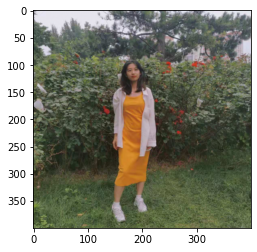

i'm not here 1
i'm not here 2
i'm not here 3
i'm not here 4
i'm not here 5
i'm not here 6
i'm not here 7
i'm not here 8
i'm not here 9
i'm not here 10
i'm not here 11
i'm not here 12
i'm not here 13
i'm not here 14
i'm not here 15
i'm not here 16
i'm not here 17
i'm not here 18
i'm not here 19
i'm not here 20
i'm not here 21
i'm not here 22
i'm not here 23
i'm not here 24
i'm not here 25
i'm not here 26
i'm not here 27
i'm not here 28
i'm not here 29
i'm not here 30
i'm not here 31
i'm not here 32
i'm not here 33
i'm not here 34
i'm not here 35
i'm not here 36
i'm not here 37
i'm not here 38
i'm not here 39
i'm not here 40
i'm not here 41
i'm not here 42
i'm not here 43
i'm not here 44
i'm not here 45
i'm not here 46
i'm not here 47
i'm not here 48
i'm not here 49
i'm not here 50
i'm not here 51
i'm not here 52
i'm not here 53
i'm not here 54
i'm not here 55
i'm not here 56
i'm not here 57
i'm not here 58
i'm not here 59
i'm not here 60
i'm not here 61
i'm not here 62
i'm not here 63
i

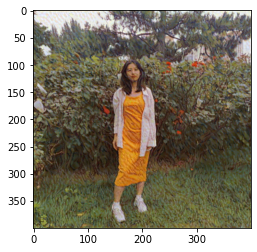

i'm not here 401
i'm not here 402
i'm not here 403
i'm not here 404
i'm not here 405
i'm not here 406
i'm not here 407
i'm not here 408
i'm not here 409
i'm not here 410
i'm not here 411
i'm not here 412
i'm not here 413
i'm not here 414
i'm not here 415
i'm not here 416
i'm not here 417
i'm not here 418
i'm not here 419
i'm not here 420
i'm not here 421
i'm not here 422
i'm not here 423
i'm not here 424
i'm not here 425
i'm not here 426
i'm not here 427
i'm not here 428
i'm not here 429
i'm not here 430
i'm not here 431
i'm not here 432
i'm not here 433
i'm not here 434
i'm not here 435
i'm not here 436
i'm not here 437
i'm not here 438
i'm not here 439
i'm not here 440
i'm not here 441
i'm not here 442
i'm not here 443
i'm not here 444
i'm not here 445
i'm not here 446
i'm not here 447
i'm not here 448
i'm not here 449
i'm not here 450
i'm not here 451
i'm not here 452
i'm not here 453
i'm not here 454
i'm not here 455
i'm not here 456
i'm not here 457
i'm not here 458
i'm not here 4

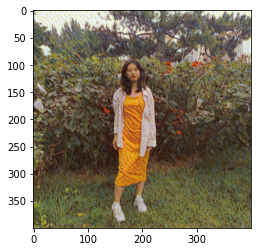

i'm not here 801
i'm not here 802
i'm not here 803
i'm not here 804
i'm not here 805
i'm not here 806
i'm not here 807
i'm not here 808
i'm not here 809
i'm not here 810
i'm not here 811
i'm not here 812
i'm not here 813
i'm not here 814
i'm not here 815
i'm not here 816
i'm not here 817
i'm not here 818
i'm not here 819
i'm not here 820
i'm not here 821
i'm not here 822
i'm not here 823
i'm not here 824
i'm not here 825
i'm not here 826
i'm not here 827
i'm not here 828
i'm not here 829
i'm not here 830
i'm not here 831
i'm not here 832
i'm not here 833
i'm not here 834
i'm not here 835
i'm not here 836
i'm not here 837
i'm not here 838
i'm not here 839
i'm not here 840
i'm not here 841
i'm not here 842
i'm not here 843
i'm not here 844
i'm not here 845
i'm not here 846
i'm not here 847
i'm not here 848
i'm not here 849
i'm not here 850
i'm not here 851
i'm not here 852
i'm not here 853
i'm not here 854
i'm not here 855
i'm not here 856
i'm not here 857
i'm not here 858
i'm not here 8

In [7]:
from visdom import Visdom
visdom_show = Visdom(env="loss")
show_every = 400
optimizer = optim.Adam([target], lr=0.003)
steps = 1200

for ii in range(steps):
    target_features = get_features(target, vgg)
    
    content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)   
    style_loss = 0
    '''加上每一层的gram_matrix矩阵的损失'''
    for layer in style_weights:
        target_feature = target_features[layer]
        target_gram = gram_matrix(target_feature)
        _, d, h, w = target_feature.shape
        style_gram = style_grams[layer]
        layer_style_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
        style_loss += layer_style_loss/(d*h*w)     #加到总的style_loss里，除以大小
        
    total_loss = content_weight * content_loss + style_weight * style_loss
    visdom_show.line(
            X=[ii],
            Y=[float(total_loss)],
            win='loss',
            name='total_loss',
            opts=dict(title='loss', legend=['total_loss']),
            update='append')
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    print("i'm not here",ii)
    if ii % show_every == 0 :
        print("i'm here",ii)
        print('Total Loss:',total_loss.item())
        plt.imshow(im_convert(target))
        plt.show()

i'm here 1200
Total Loss: 1714092.625


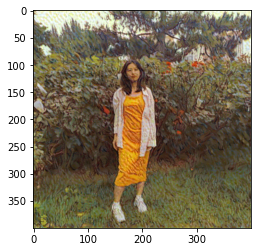

In [11]:
ii=1200
target_features = get_features(target, vgg)
    
content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)   
style_loss = 0
'''加上每一层的gram_matrix矩阵的损失'''
for layer in style_weights:
    target_feature = target_features[layer]
    target_gram = gram_matrix(target_feature)
    _, d, h, w = target_feature.shape
    style_gram = style_grams[layer]
    layer_style_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
    style_loss += layer_style_loss/(d*h*w)     #加到总的style_loss里，除以大小
        
total_loss = content_weight * content_loss + style_weight * style_loss
optimizer.zero_grad()
total_loss.backward()
optimizer.step()
print("i'm here",ii)
print('Total Loss:',total_loss.item())
plt.imshow(im_convert(target))
plt.show()

In [4]:
content  = load_img('images/me.jpg')
style = load_img('images/style.jpg', shape=content.shape[-2:])#让两张图尺寸一样

'''转换为plt可以画出来的形式'''
def im_convert(tensor):
    img = tensor.clone().detach()
    img = img.numpy().squeeze()
    img = img.transpose(1,2,0)  #转换索引，在论文第一部分提到了。
    img = img * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    img = img.clip(0,1)
    return img

In [5]:
def get_features(img, model, layers=None):
    '''获取特征层'''    #风格迁移的关键，从风格图像中提取特征
    if layers is None:
        layers = {
            '0':'conv1_1',
            '5':'conv2_1',
            '10':'conv3_1',
            '19':'conv4_1',
            '21':'conv4_2',    #content层
            '28':'conv5_1'
        }
    
    features = {}
    x = img
    for name, layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x
    
    return features

def gram_matrix(tensor):
    '''计算Gram matrix'''
    _, d, h, w = tensor.size()  #第一个是batch_size
    
    tensor = tensor.view(d, h*w)
    
    gram = torch.mm(tensor, tensor.t())
    
    return gram    

content_features = get_features(content, vgg)
style_features = get_features(style, vgg)

style_grams = {layer:gram_matrix(style_features[layer]) for layer in style_features}

target = content.clone().requires_grad_(True)

'''定义不同层的权重'''
style_weights = {
    'conv1_1': 1,
    'conv2_1': 0.8,
    'conv3_1': 0.5,
    'conv4_1': 0.3,
    'conv5_1': 0.1,
}
'''定义2种损失对应的权重'''
content_weight = 1
style_weight = 1e6

D:\anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Setting up a new session...


i'm not here 0
i'm here 0
Total Loss: 40783940.0


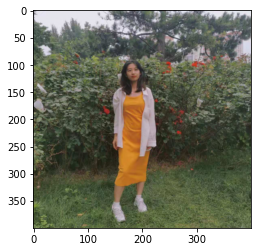

i'm not here 1
i'm not here 2
i'm not here 3
i'm not here 4
i'm not here 5
i'm not here 6
i'm not here 7
i'm not here 8
i'm not here 9
i'm not here 10
i'm not here 11
i'm not here 12
i'm not here 13
i'm not here 14
i'm not here 15
i'm not here 16
i'm not here 17
i'm not here 18
i'm not here 19
i'm not here 20
i'm not here 21
i'm not here 22
i'm not here 23
i'm not here 24
i'm not here 25
i'm not here 26
i'm not here 27
i'm not here 28
i'm not here 29
i'm not here 30
i'm not here 31
i'm not here 32
i'm not here 33
i'm not here 34
i'm not here 35
i'm not here 36
i'm not here 37
i'm not here 38
i'm not here 39
i'm not here 40
i'm not here 41
i'm not here 42
i'm not here 43
i'm not here 44
i'm not here 45
i'm not here 46
i'm not here 47
i'm not here 48
i'm not here 49
i'm not here 50
i'm not here 51
i'm not here 52
i'm not here 53
i'm not here 54
i'm not here 55
i'm not here 56
i'm not here 57
i'm not here 58
i'm not here 59
i'm not here 60
i'm not here 61
i'm not here 62
i'm not here 63
i

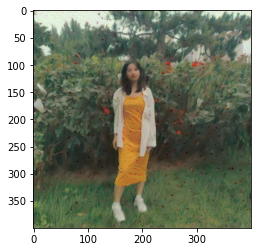

i'm not here 401
i'm not here 402
i'm not here 403
i'm not here 404
i'm not here 405
i'm not here 406
i'm not here 407
i'm not here 408
i'm not here 409
i'm not here 410
i'm not here 411
i'm not here 412
i'm not here 413
i'm not here 414
i'm not here 415
i'm not here 416
i'm not here 417
i'm not here 418
i'm not here 419
i'm not here 420
i'm not here 421
i'm not here 422
i'm not here 423
i'm not here 424
i'm not here 425
i'm not here 426
i'm not here 427
i'm not here 428
i'm not here 429
i'm not here 430
i'm not here 431
i'm not here 432
i'm not here 433
i'm not here 434
i'm not here 435
i'm not here 436
i'm not here 437
i'm not here 438
i'm not here 439
i'm not here 440
i'm not here 441
i'm not here 442
i'm not here 443
i'm not here 444
i'm not here 445
i'm not here 446
i'm not here 447
i'm not here 448
i'm not here 449
i'm not here 450
i'm not here 451
i'm not here 452
i'm not here 453
i'm not here 454
i'm not here 455
i'm not here 456
i'm not here 457
i'm not here 458
i'm not here 4

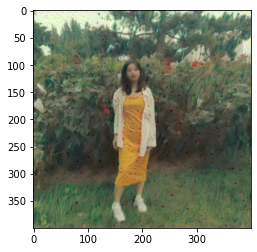

i'm not here 801
i'm not here 802
i'm not here 803
i'm not here 804
i'm not here 805
i'm not here 806
i'm not here 807
i'm not here 808
i'm not here 809
i'm not here 810
i'm not here 811
i'm not here 812
i'm not here 813
i'm not here 814
i'm not here 815
i'm not here 816
i'm not here 817
i'm not here 818
i'm not here 819
i'm not here 820
i'm not here 821
i'm not here 822
i'm not here 823
i'm not here 824
i'm not here 825
i'm not here 826
i'm not here 827
i'm not here 828
i'm not here 829
i'm not here 830
i'm not here 831
i'm not here 832
i'm not here 833
i'm not here 834
i'm not here 835
i'm not here 836
i'm not here 837
i'm not here 838
i'm not here 839
i'm not here 840
i'm not here 841
i'm not here 842
i'm not here 843
i'm not here 844
i'm not here 845
i'm not here 846
i'm not here 847
i'm not here 848
i'm not here 849
i'm not here 850
i'm not here 851
i'm not here 852
i'm not here 853
i'm not here 854
i'm not here 855
i'm not here 856
i'm not here 857
i'm not here 858
i'm not here 8

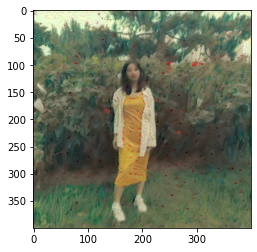

In [6]:
from visdom import Visdom
visdom_show = Visdom(env="style")
show_every = 400
optimizer = optim.Adam([target], lr=0.003)
steps = 1201

for ii in range(steps):
    target_features = get_features(target, vgg)
    
    content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)   
    style_loss = 0
    '''加上每一层的gram_matrix矩阵的损失'''
    for layer in style_weights:
        target_feature = target_features[layer]
        target_gram = gram_matrix(target_feature)
        _, d, h, w = target_feature.shape
        style_gram = style_grams[layer]
        layer_style_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
        style_loss += layer_style_loss/(d*h*w)     #加到总的style_loss里，除以大小
        
    total_loss = content_weight * content_loss + style_weight * style_loss
    visdom_show.line(
            X=[ii],
            Y=[float(total_loss)],
            win='loss',
            name='total_loss',
            opts=dict(title='loss', legend=['total_loss']),
            update='append')
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    print("i'm not here",ii)
    if ii % show_every == 0 :
        print("i'm here",ii)
        print('Total Loss:',total_loss.item())
        plt.imshow(im_convert(target))
        plt.show()